In [1]:
# 📦 Step 0: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 🗂️ Step 1: Load the Dataset
df = pd.read_excel("Day2_firm_data.xlsx")  # Ensure the file is in the same directory or provide full path
# print(df.head())  # Preview the first few rows

In [3]:
# Basic Info
df.info()

# Descriptive statistics for numerical variables
# print(df.describe())

# Check for column names and types
# print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Firm_Name                    205 non-null    object 
 1   Year                         205 non-null    int64  
 2   Revenue                      195 non-null    float64
 3   Capital                      195 non-null    float64
 4   RND_Expenses                 195 non-null    float64
 5   Advertising_Expenses         195 non-null    float64
 6   Debt_Equity_Ratio            195 non-null    float64
 7   Firm_Size                    205 non-null    float64
 8   Market_Share                 205 non-null    float64
 9   Export_Ratio                 205 non-null    float64
 10  Average_Salary_LPA           205 non-null    float64
 11  Customer_Satisfaction_Score  195 non-null    float64
 12  Profit                       205 non-null    float64
 13  Internal_Notes      

In [4]:
# 'Internal_Notes' is not useful for analysis
df.drop(columns=['Internal_Notes'], inplace=True)

In [5]:
# Step-by-step to find and display duplicate rows
# ✅ Find and print duplicate rows (excluding the first occurrence)
duplicates = df[df.duplicated()]

# Display them
print("Duplicate Rows:")
print(duplicates)


# If you want to see all instances of duplicates, including the first occurrence (i.e. fully repeated rows), use:
# ✅ Show all occurrences of duplicate rows (including the first)
# duplicates_all = df[df.duplicated(keep=False)]

# print("All duplicate rows (including originals):")
# print(duplicates_all)


Duplicate Rows:
             Firm_Name  Year     Revenue     Capital  RND_Expenses   
200  Prime Enterprises  2020  464.471729  499.456821      7.473484  \
201    Zenith Holdings  2020  781.998904  176.863260     19.311783   
202    Nova Industries  2020  267.199259   88.234830     24.631071   
203      Omni Holdings  2021  256.567335  212.547227     33.678597   
204       Delta Global  2021  101.285509  252.312509     42.658854   

     Advertising_Expenses  Debt_Equity_Ratio    Firm_Size  Market_Share   
200             62.068764           0.422031   857.152067      0.137473  \
201             93.217761           0.319275  2479.608062      0.274712   
202             69.247670           1.807096  1456.095247      0.171870   
203             16.362695           1.510007  2720.517385      0.298905   
204             61.508367           3.996908  1505.548564      0.091332   

     Export_Ratio  Average_Salary_LPA  Customer_Satisfaction_Score      Profit  
200      0.510460            9.

In [6]:
# Find number of duplicate rows
print("Duplicates:", df.duplicated().sum())

# Drop them if any
df = df.drop_duplicates()

Duplicates: 5


In [7]:
# Sanity check

duplicates = df[df.duplicated()]

# Display them
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Firm_Name, Year, Revenue, Capital, RND_Expenses, Advertising_Expenses, Debt_Equity_Ratio, Firm_Size, Market_Share, Export_Ratio, Average_Salary_LPA, Customer_Satisfaction_Score, Profit]
Index: []


In [8]:
# Show missing values per column
print(df.isnull().sum())

Firm_Name                       0
Year                            0
Revenue                        10
Capital                        10
RND_Expenses                   10
Advertising_Expenses           10
Debt_Equity_Ratio              10
Firm_Size                       0
Market_Share                    0
Export_Ratio                    0
Average_Salary_LPA              0
Customer_Satisfaction_Score    10
Profit                          0
dtype: int64


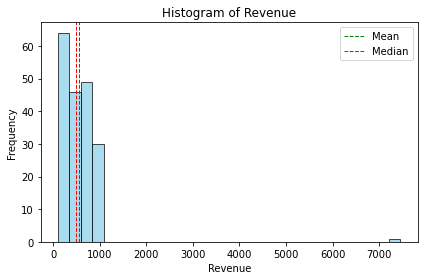

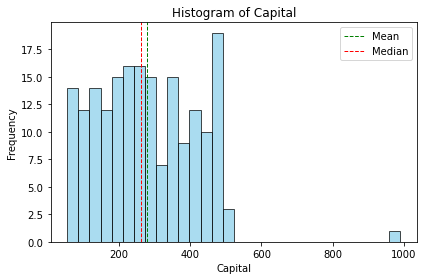

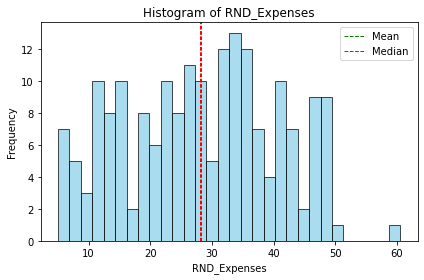

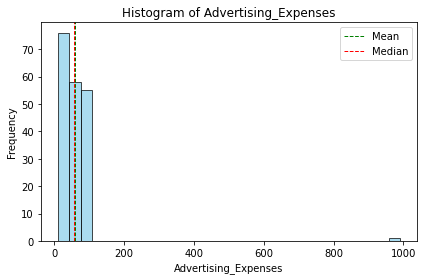

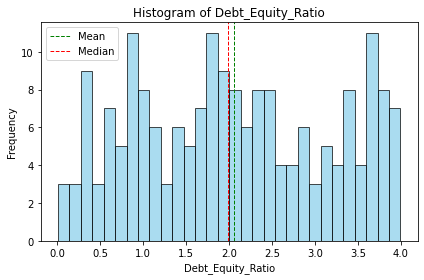

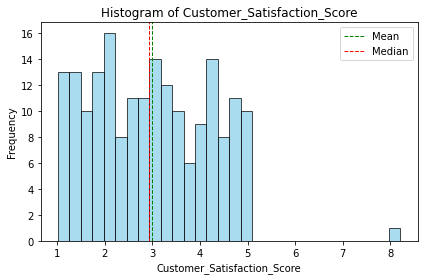

In [9]:
import numpy as np
import matplotlib.pyplot as plt

cols_with_missing = [
    'Revenue', 'Capital', 'RND_Expenses',
    'Advertising_Expenses', 'Debt_Equity_Ratio',
    'Customer_Satisfaction_Score'
]

for col in cols_with_missing:
    data = df[col].dropna()
    n = len(data)
    
    # Example: Sturges' Rule
    #bins = int(np.ceil(np.log2(n) + 1))
    #bins = int(np.ceil(np.sqrt(n)))

    bins = 30
    
    # Plot with Matplotlib
    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(data.mean(), color='green', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(data.median(), color='red', linestyle='dashed', linewidth=1, label='Median')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [10]:
# Impute using median for financial variables
df['Revenue'].fillna(df['Revenue'].median(), inplace=True)
df['Capital'].fillna(df['Capital'].median(), inplace=True)
df['Advertising_Expenses'].fillna(df['Advertising_Expenses'].median(), inplace=True)
df['Debt_Equity_Ratio'].fillna(df['Debt_Equity_Ratio'].median(), inplace=True)

# Impute using mean for satisfaction scores
df['RND_Expenses'].fillna(df['RND_Expenses'].mean(), inplace=True)
df['Customer_Satisfaction_Score'].fillna(df['Customer_Satisfaction_Score'].mean(), inplace=True)

In [11]:
# Show missing values per column
print(df.isnull().sum())

Firm_Name                      0
Year                           0
Revenue                        0
Capital                        0
RND_Expenses                   0
Advertising_Expenses           0
Debt_Equity_Ratio              0
Firm_Size                      0
Market_Share                   0
Export_Ratio                   0
Average_Salary_LPA             0
Customer_Satisfaction_Score    0
Profit                         0
dtype: int64


In [12]:
num_cols = [
    'Revenue', 'Capital', 'RND_Expenses', 'Advertising_Expenses',
    'Debt_Equity_Ratio', 'Customer_Satisfaction_Score'
]

In [13]:
def get_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Example: Find outliers in 'Revenue'
outliers_revenue = get_outliers(df, 'Revenue')
print(outliers_revenue[['Firm_Name', 'Year', 'Revenue']])

           Firm_Name  Year      Revenue
6  Sigma Enterprises  2020  7460.846302


In [14]:
# Apply IQR capping to each column
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [15]:
def get_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Example: Find outliers in 'Revenue'
outliers_revenue = get_outliers(df, 'Revenue')
print(outliers_revenue[['Firm_Name', 'Year', 'Revenue']])

Empty DataFrame
Columns: [Firm_Name, Year, Revenue]
Index: []


In [16]:
# Filter data for 2020 and 2021 separately
df_2020 = df[df['Year'] == 2020].copy()
df_2021 = df[df['Year'] == 2021].copy()

print("2020 Records:", len(df_2020))
print("2021 Records:", len(df_2021))

2020 Records: 100
2021 Records: 100


### OLS
#### We want to understand what factors influence a firm's Profit. Let's build a regression model. We'll start with a basic OLS model on the 2020 data.

In [17]:
# This imports the statsmodels library, which is used for running statistical models like linear regression (OLS), 
# logistic regression, and many others.

import statsmodels.api as sm

# Define the dependent and independent variables

## This creates the independent variable matrix (X) — also called predictors or features.
## These are the variables you think influence profit.
## You are selecting six columns (variables) from your 2020 dataset. This becomes the RHS of regression equation.
X = df_2020[['Revenue', 'Capital', 'RND_Expenses', 'Advertising_Expenses',
             'Debt_Equity_Ratio', 'Customer_Satisfaction_Score']]


## This defines your dependent variable (also called the target or outcome), which in this case is Profit.
## This is what you're trying to explain or predict using the variables in X.
y = df_2020['Profit']


# Add constant to X

## Without adding a constant, your regression would assume the 
## line passes through the origin (0,0) — which is usually unrealistic.
X = sm.add_constant(X)

In [18]:
# Fit the OLS model
model = sm.OLS(y, X).fit()

## sm.OLS - This line sets up the OLS (Ordinary Least Squares) model
## BUT — this doesn’t run the model yet.
## It just says: “Here’s the setup for the regression.

## .fit() - This actually runs the regression and finds the best-fitting line through the data 
## by minimizing the sum of squared errors (hence “least squares”)

## model = ...This stores the entire fitted model (with all results) into the variable model

In [19]:
# Show the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     7.969
Date:                Thu, 29 May 2025   Prob (F-statistic):           6.04e-07
Time:                        10:55:43   Log-Likelihood:                -673.59
No. Observations:                 100   AIC:                             1361.
Df Residuals:                      93   BIC:                             1379.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [20]:
df_2020['Predicted_Profit'] = model.predict(X)
## model.predict(X) computes the predicted profit based on your fitted regression model 
## using the independent variables.
# By assigning it to a new column Predicted_Profit, you're adding it directly to your DataFrame df_2020.

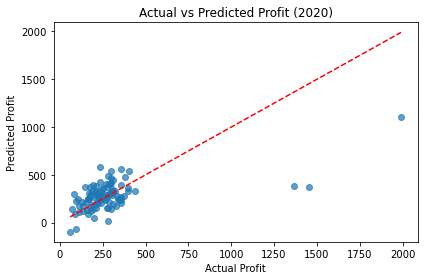

In [21]:
# Scatter plot of actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(df_2020['Profit'], df_2020['Predicted_Profit'], alpha=0.7)
plt.plot([df_2020['Profit'].min(), df_2020['Profit'].max()],
         [df_2020['Profit'].min(), df_2020['Profit'].max()],
         color='red', linestyle='--')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit (2020)")
plt.tight_layout()
plt.show()

# Train and Test

In [22]:
# 📦 Required Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## train_test_split splits data randomly for training and testing.
## mean_squared_error and r2_score are used to evaluate how good the predictions are.

In [23]:
X_2021 = df_2021[['Revenue', 'Capital', 'RND_Expenses', 'Advertising_Expenses',
                  'Debt_Equity_Ratio', 'Customer_Satisfaction_Score']]
y_2021 = df_2021['Profit']

# This creates X (independent variables) and y (dependent variable) for 2021.

In [24]:
# ➗ Split into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_2021, y_2021, test_size=0.3, random_state=42)

In [25]:
# ➕ Add constant (intercept) to both sets
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [26]:
# 🏗️ Train the model on training data
model_2021 = sm.OLS(y_train, X_train_const).fit()

# OLS model learns patterns only from the training data.

In [27]:
print(model_2021.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     7.205
Date:                Thu, 29 May 2025   Prob (F-statistic):           7.01e-06
Time:                        10:55:43   Log-Likelihood:                -383.59
No. Observations:                  70   AIC:                             781.2
Df Residuals:                      63   BIC:                             796.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [28]:
# Now we apply the trained model to test data and generate predictions.
# 🔮 Predict on test data
y_pred = model_2021.predict(X_test_const)

In [29]:
# 📐 Calculate metrics

## Mean Squared Error (MSE) between your model's predictions and the actual profits in the test set.
## It measures how far off the predictions are, on average.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

## Calculates the R-squared (R²) — the proportion of variance in actual profit that the model can explain.
## R² = 1 → Perfect prediction
## R² = 0 → Model is no better than guessing the average
## R² < 0 → Model is worse than guessing the average 😬
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

RMSE: 242.02436017393717
R-squared: -0.029479336264268907


In [30]:
# Training set performance
y_train_pred = model.predict(sm.add_constant(X_train))
r2_train = r2_score(y_train, y_train_pred)

# Testing set performance
y_test_pred = model.predict(sm.add_constant(X_test))
r2_test = r2_score(y_test, y_test_pred)

print("Training R²:", r2_train)
print("Testing R²:", r2_test)

Training R²: -1.661365599009729
Testing R²: -0.07742089153758469


In [31]:
#| Scenario                      | What You See in R²               | Interpretation                 |
#| ----------------------------- | -------------------------------- | ------------------------------ |
#| 🔴 Low Train R², Low Test R²  | Both bad → Model is underfitting | Too simple                     |
#| 🟠 High Train R², Low Test R² | Big drop → Model is overfitting  | Too complex / memorizing noise |
#| 🟢 Balanced R² (Train ≈ Test) | Model generalizes well           | Just right 👍                  |

In [32]:
# ➕ Add constant to full X_2021 to use the model for prediction on full data
X_2021_const = sm.add_constant(X_2021)

# 🔮 Predict profit for all firms in 2021 (including both train and test firms)
df_2021['Predicted_Profit'] = model_2021.predict(X_2021_const)

# 📤 Export the DataFrame with predictions to CSV
df_2021.to_csv("Firm_2021_with_Predicted_Profit.csv", index=False)

In [33]:
# 📊 Extract model summary (coefficients, p-values, etc.)
summary_df = model_2021.summary2().tables[1]  # This gives you the table with coef, std err, p-values, etc.

# 📁 Export both summary and full data (with predictions) to Excel
with pd.ExcelWriter("OLS_Model_2021_Summary.xlsx") as writer:
    summary_df.to_excel(writer, sheet_name="Model Summary")
    df_2021.to_excel(writer, sheet_name="Data with Predictions", index=False)